# # GSV: a general model for hyperspectral soil reflectance simulation

Soil reflectance is crucial for canopy radiative transfer modeling. Spectral vector models are more flexible than typical soil albedo models, because they can ingest observed data and significantly improves hyperspectral soil reflectance modeling in terms of accuracy and robustness. 

We demonstrate the usage of the general spectral vectors (GSV) model[^1] developed to employ three dry spectral vectors and one humid spectral vector derived from global dry and humid soil reflectance databases including 23,871 soil spectra (400–2500 nm). The GSV model accurately simulates global soil reflectance with an R2 of 0.99 and RMSE of 0.01. The GSV model is highly suitable to be coupled with the CliMA model for vegetation remote sensing studies. 

 [^1]: Jiang, C., & Fang, H. (2019). GSV: a general model for hyperspectral soil reflectance simulation. International Journal of Applied Earth Observation and Geoinformation, 83(July), 101932. https://doi.org/10.1016/j.jag.2019.101932


# Load used packages

In [149]:
## Use Julia Plots package and switch to plotly js option:
using Plots
using StatsPlots
pyplot()

#----------------------------------------------------------------------------

# First, we include Revise (good for debugging) and Parameters (tools for structures)

#using Revise
using Parameters
using Statistics
using CSV
using DataStructures

#----------------------------------------------------------------------------
using LinearAlgebra

# Define used variables

In [213]:
# The hyperspectral wavelengths
WVL = 400:10:2501
# The general spectral vectors derived in the manuscript
GSV = [CSV.read("DryVec.csv"; header=false);CSV.read("SMVec.csv"; header=false)]
# The test hyperspectral data
hyper = CSV.read("TestSpectrum_v1.csv";header=false)
# The wavelengths of multispectral data
wvl = [450,550,650,850,1650,2150]
# The test multispectral data sliced from hyperspectral data
indices = []

for i in wvl
    push!(indices, findall(x -> x==i, WVL)[1])
end 

multi = hyper[:,indices]


# Step 1: slice GSV according to the wavelengths of multispectral data
gsv = GSV[:,indices]

1×6 Array{Float64,2}:
 0.12365  0.145  0.1739  0.24015  0.3372  0.3076

# Define plot

In [182]:
# Step 2: fit multispectral soil reflectance and reconstruct multispectral soil reflectance
X=convert(Matrix,multi)
V=convert(Matrix,gsv)
C = X * LinearAlgebra.pinv(V)
R = C * V
R[R.<0] .= 0
R[R.>1] .= 1

0-element view(::Array{Float64,1}, Int64[]) with eltype Float64

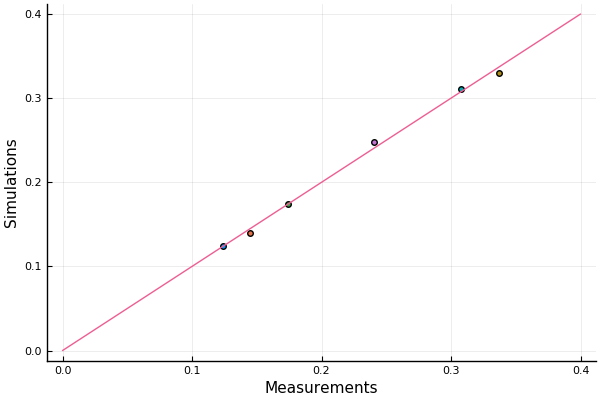

In [188]:
scatter(X,R,label="")
plot!([0,0.4],[0,0.4],label="")
ylabel!("Simulations")
xlabel!("Measurements")

In [189]:
# Step 3: reconstruct hyperspectral soil reflectance using coefficients fitted from multispectral data
X = convert(Matrix,hyper)
V = convert(Matrix,GSV)
R = C * V
R[R.<0] .= 0
R[R.>1] .= 1

0-element view(::Array{Float64,1}, Int64[]) with eltype Float64

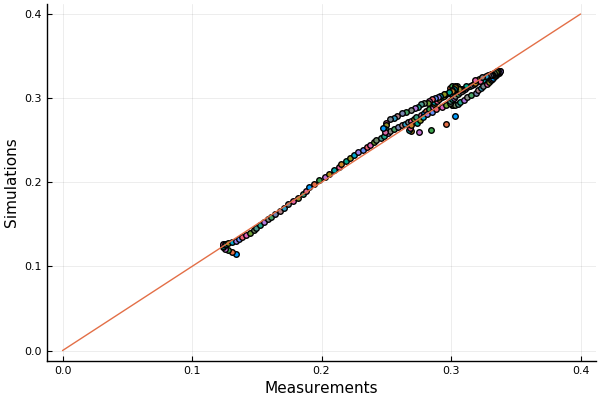

In [190]:
scatter(X,R,label="")
plot!([0,0.4],[0,0.4],label="")
ylabel!("Simulations")
xlabel!("Measurements")

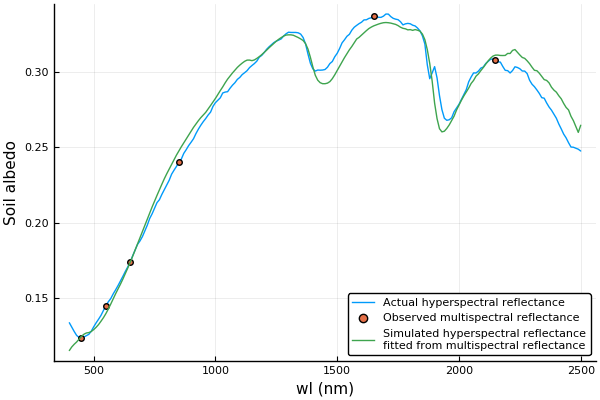

In [222]:
# Compare measured multispectral data and hyperspectral data with reconstructed ones
plot(WVL,transpose(convert(Matrix,hyper)),label="Actual hyperspectral reflectance")
scatter!(wvl,transpose(Matrix(multi)),label="Observed multispectral reflectance")
plot!(WVL,transpose(R),label="Simulated hyperspectral reflectance\nfitted from multispectral reflectance")
ylabel!("Soil albedo")
xlabel!("wl (nm)")
